In [1]:
import torch
import joblib

In [2]:
data = joblib.load('../training_checkpoints/embeddings.joblib')

In [3]:
import pandas as pd

predicted_df = pd.DataFrame(columns = ['embedding', 'label', 'vis_embed'])
predicted_df['embedding'] = data['predicted_embeddings']
predicted_df['label'] = 'predicted'

actual_df = pd.DataFrame(columns = ['embedding', 'label', 'vis_embed'])
actual_df['embedding'] = data['actual_embeddings']
actual_df['label'] = 'actual'

df = pd.concat([predicted_df, actual_df])

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

vis_dims = pca.fit_transform(df['embedding'].tolist())

In [5]:
df['vis_embed'] = vis_dims.tolist()

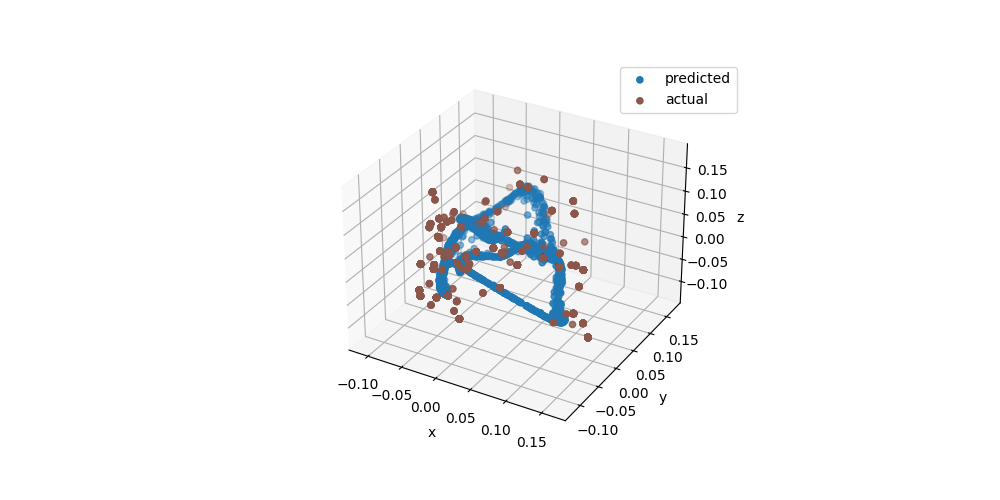

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

categories = df["label"].unique()
# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["label"] == cat]["vis_embed"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))